In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import phik
from phik import resources
from phik.binning import bin_data
from phik.decorators import *
from phik.report import plot_correlation_matrix
import networkx as nx

In [4]:
df = pd.read_csv('train.csv')
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [6]:
df0 = df[(df['credit_card_default']==0)]
df1 = df[(df['credit_card_default']==1)]

In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41831 entries, 1 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              41831 non-null  object 
 1   name                     41831 non-null  object 
 2   age                      41831 non-null  int64  
 3   gender                   41831 non-null  object 
 4   owns_car                 41330 non-null  object 
 5   owns_house               41831 non-null  object 
 6   no_of_children           41123 non-null  float64
 7   net_yearly_income        41831 non-null  float64
 8   no_of_days_employed      41403 non-null  float64
 9   occupation_type          41831 non-null  object 
 10  total_family_members     41755 non-null  float64
 11  migrant_worker           41750 non-null  float64
 12  yearly_debt_payments     41744 non-null  float64
 13  credit_limit             41831 non-null  float64
 14  credit_limit_used(%)  

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3697 entries, 0 to 45518
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              3697 non-null   object 
 1   name                     3697 non-null   object 
 2   age                      3697 non-null   int64  
 3   gender                   3697 non-null   object 
 4   owns_car                 3651 non-null   object 
 5   owns_house               3697 non-null   object 
 6   no_of_children           3631 non-null   float64
 7   net_yearly_income        3697 non-null   float64
 8   no_of_days_employed      3662 non-null   float64
 9   occupation_type          3697 non-null   object 
 10  total_family_members     3690 non-null   float64
 11  migrant_worker           3691 non-null   float64
 12  yearly_debt_payments     3689 non-null   float64
 13  credit_limit             3697 non-null   float64
 14  credit_limit_used(%)   

In [9]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    zero_per = round((count/45528)*100,2)
    print('Count of O in', column_name, ' is : ', count, '(',zero_per,'%)')

Count of O in customer_id  is :  0 ( 0.0 %)
Count of O in name  is :  0 ( 0.0 %)
Count of O in age  is :  0 ( 0.0 %)
Count of O in gender  is :  0 ( 0.0 %)
Count of O in owns_car  is :  0 ( 0.0 %)
Count of O in owns_house  is :  0 ( 0.0 %)
Count of O in no_of_children  is :  31241 ( 68.62 %)
Count of O in net_yearly_income  is :  0 ( 0.0 %)
Count of O in no_of_days_employed  is :  0 ( 0.0 %)
Count of O in occupation_type  is :  0 ( 0.0 %)
Count of O in total_family_members  is :  0 ( 0.0 %)
Count of O in migrant_worker  is :  37302 ( 81.93 %)
Count of O in yearly_debt_payments  is :  0 ( 0.0 %)
Count of O in credit_limit  is :  0 ( 0.0 %)
Count of O in credit_limit_used(%)  is :  430 ( 0.94 %)
Count of O in credit_score  is :  0 ( 0.0 %)
Count of O in prev_defaults  is :  43060 ( 94.58 %)
Count of O in default_in_last_6months  is :  43227 ( 94.95 %)
Count of O in credit_card_default  is :  41831 ( 91.88 %)


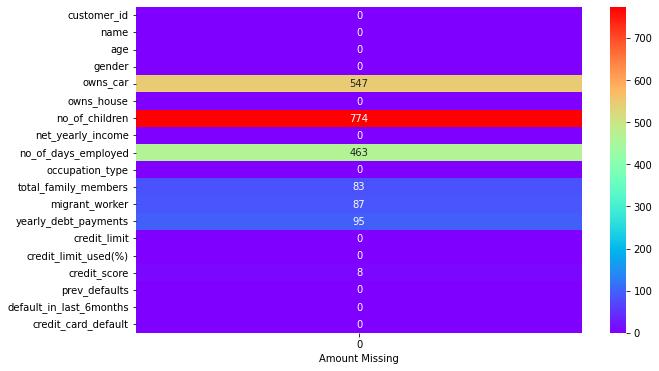

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df.isnull().sum().to_frame(), annot=True, fmt = 'd', cmap = 'rainbow')
ax.set_xlabel('Amount Missing');

In [12]:
selected_rows = df0[~df0.isnull().any(axis=1)]
selected_rows

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
5,CST_123268,Sarah Marsh,46,F,Y,N,0.0,252765.91,2898.0,Accountants,2.0,1.0,37046.86,40245.64,19,937.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,Doris,55,F,N,N,2.0,96207.57,117.0,Unknown,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,CST_136670,Luciana,31,F,N,Y,0.0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,Jessica,27,F,N,Y,0.0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,Tessa,32,M,Y,N,0.0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


In [36]:
df0 = selected_rows.sample(3697)
df0

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
38292,CST_147263,Baldwin,25,F,N,N,0.0,435928.11,641.0,Managers,1.0,1.0,67425.06,140558.16,87,729.0,0,0,0
35089,CST_134196,Matthias,34,F,N,N,0.0,394967.77,7380.0,Sales staff,2.0,0.0,66814.80,92461.97,20,761.0,0,0,0
26506,CST_157744,Lawder,41,M,Y,Y,2.0,203365.64,246.0,Laborers,4.0,0.0,16082.96,53216.26,54,878.0,0,0,0
3579,CST_165801,Blenkinsop,40,F,N,Y,0.0,489093.26,365243.0,Unknown,1.0,0.0,35375.43,162770.74,36,941.0,0,0,0
7758,CST_162891,Wildau,48,M,N,Y,0.0,389602.71,365247.0,Unknown,2.0,0.0,73871.06,91830.51,59,853.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,CST_145388,ita,42,M,N,Y,0.0,122617.75,810.0,Laborers,2.0,0.0,24224.64,17030.89,50,841.0,0,0,0
17356,CST_142220,Caroline,34,F,N,Y,1.0,131751.82,1766.0,Laborers,3.0,0.0,51831.96,31806.54,51,808.0,0,0,0
6082,CST_147993,Shiraki,54,M,Y,N,0.0,134675.99,489.0,Drivers,1.0,1.0,30164.36,45116.04,63,691.0,0,0,0
33496,CST_135762,Gerry,46,F,Y,Y,0.0,216262.82,3374.0,Cooking staff,2.0,1.0,27398.22,78258.40,16,708.0,0,0,0


In [68]:
df = pd.concat([df0, df1])

In [78]:
df.to_csv('df.csv', index=False)

# START . NEW DATASET

In [187]:
df = pd.read_csv('df.csv')
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_147263,Baldwin,25,F,N,N,0.0,435928.11,641.0,Managers,1.0,1.0,67425.06,140558.16,87,729.0,0,0,0
1,CST_134196,Matthias,34,F,N,N,0.0,394967.77,7380.0,Sales staff,2.0,0.0,66814.80,92461.97,20,761.0,0,0,0
2,CST_157744,Lawder,41,M,Y,Y,2.0,203365.64,246.0,Laborers,4.0,0.0,16082.96,53216.26,54,878.0,0,0,0
3,CST_165801,Blenkinsop,40,F,N,Y,0.0,489093.26,365243.0,Unknown,1.0,0.0,35375.43,162770.74,36,941.0,0,0,0
4,CST_162891,Wildau,48,M,N,Y,0.0,389602.71,365247.0,Unknown,2.0,0.0,73871.06,91830.51,59,853.0,0,0,0


In [162]:
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_147263,Baldwin,25,F,N,N,0.0,435928.11,641.0,Managers,1.0,1.0,67425.06,140558.16,87,729.0,0,0,0
1,CST_134196,Matthias,34,F,N,N,0.0,394967.77,7380.0,Sales staff,2.0,0.0,66814.80,92461.97,20,761.0,0,0,0
2,CST_157744,Lawder,41,M,Y,Y,2.0,203365.64,246.0,Laborers,4.0,0.0,16082.96,53216.26,54,878.0,0,0,0
3,CST_165801,Blenkinsop,40,F,N,Y,0.0,489093.26,365243.0,Unknown,1.0,0.0,35375.43,162770.74,36,941.0,0,0,0
4,CST_162891,Wildau,48,M,N,Y,0.0,389602.71,365247.0,Unknown,2.0,0.0,73871.06,91830.51,59,853.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,CST_139474,Nate,41,F,N,Y,0.0,250165.88,171.0,Core staff,2.0,0.0,56649.36,43642.26,82,512.0,1,1,1
7390,CST_105181,Ann Saphir,54,M,N,N,2.0,147117.20,1897.0,Laborers,4.0,1.0,38991.49,35913.65,91,548.0,2,1,1
7391,CST_155055,Ingram,44,F,N,Y,1.0,139405.59,2908.0,Laborers,3.0,1.0,37108.98,28232.83,83,579.0,1,1,1
7392,CST_165002,Goldstein,55,F,N,Y,0.0,119513.98,7220.0,Core staff,2.0,0.0,46865.75,44513.68,98,682.0,0,0,1


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              7394 non-null   object 
 1   name                     7394 non-null   object 
 2   age                      7394 non-null   int64  
 3   gender                   7394 non-null   object 
 4   owns_car                 7394 non-null   object 
 5   owns_house               7394 non-null   object 
 6   no_of_children           7394 non-null   float64
 7   net_yearly_income        7394 non-null   float64
 8   no_of_days_employed      7394 non-null   float64
 9   occupation_type          7394 non-null   object 
 10  total_family_members     7394 non-null   float64
 11  migrant_worker           7394 non-null   float64
 12  yearly_debt_payments     7386 non-null   float64
 13  credit_limit             7394 non-null   float64
 14  credit_limit_used(%)    

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='credit_card_default', ylabel='count'>

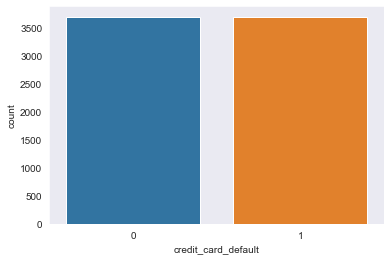

In [164]:
sns.countplot(df['credit_card_default'], )

[Text(0, 0, '3697 (50%)'), Text(0, 0, '3697 (50%)')]

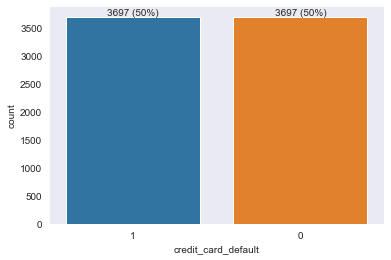

In [165]:
ax = sns.countplot(x=df['credit_card_default'],
                   order=df['credit_card_default'].value_counts(ascending=False).index);
        
abs_values = df['credit_card_default'].value_counts(ascending=False)
rel_values = df['credit_card_default'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

In [166]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = column.isna().sum().sum()
    print('Count of Nan in', column_name, ' is : ', count)

Count of Nan in customer_id  is :  0
Count of Nan in name  is :  0
Count of Nan in age  is :  0
Count of Nan in gender  is :  0
Count of Nan in owns_car  is :  0
Count of Nan in owns_house  is :  0
Count of Nan in no_of_children  is :  0
Count of Nan in net_yearly_income  is :  0
Count of Nan in no_of_days_employed  is :  0
Count of Nan in occupation_type  is :  0
Count of Nan in total_family_members  is :  0
Count of Nan in migrant_worker  is :  0
Count of Nan in yearly_debt_payments  is :  8
Count of Nan in credit_limit  is :  0
Count of Nan in credit_limit_used(%)  is :  0
Count of Nan in credit_score  is :  1
Count of Nan in prev_defaults  is :  0
Count of Nan in default_in_last_6months  is :  0
Count of Nan in credit_card_default  is :  0


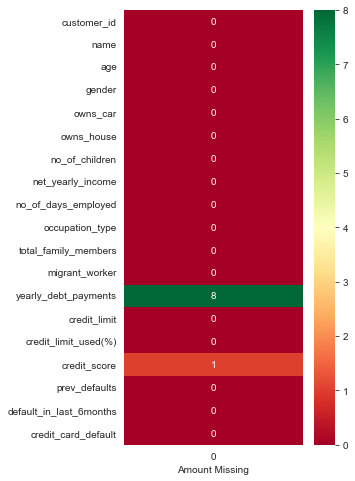

In [167]:
plt.figure(figsize=(4, 8))
ax = sns.heatmap(df.isnull().sum().to_frame(), annot=True, fmt = 'd', cmap = 'RdYlGn')
ax.set_xlabel('Amount Missing');

In [14]:
values = {'owns_car': 'N', 'no_of_children': 0, 'migrant_worker': 0, 'total_family_members': 1, 'no_of_days_employed': 0, 
          'yearly_debt_payments': np.median(test.yearly_debt_payments.dropna()), 'credit_score': np.median(test.credit_score.dropna())}

In [15]:
test.fillna(value = values, inplace = True)

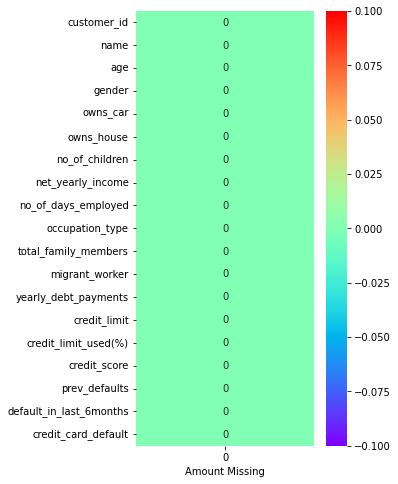

In [17]:
plt.figure(figsize=(4, 8))
ax = sns.heatmap(test.isnull().sum().to_frame(), annot=True, fmt = 'd', cmap = 'rainbow')
ax.set_xlabel('Amount Missing');

In [171]:
df.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,7394.000000,7394.000000,7.394000e+03,7394.000000,7394.000000,7394.000000,7394.000000,7.394000e+03,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000
mean,39.053692,0.447525,2.120150e+05,58475.849202,2.175548,0.198404,31373.246688,4.642239e+04,66.805788,699.106843,0.373817,0.311198,0.500000
std,9.587768,0.744350,1.638283e+06,131474.004130,0.939689,0.398825,16220.484450,3.626720e+05,27.570073,123.953342,0.560522,0.463015,0.500034
min,23.000000,0.000000,2.717061e+04,0.000000,1.000000,0.000000,3256.330000,4.003140e+03,0.000000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.249198e+05,794.250000,2.000000,0.000000,19741.282500,2.394762e+04,49.000000,599.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.702261e+05,1813.000000,2.000000,0.000000,29137.605000,3.549465e+04,76.000000,679.000000,0.000000,0.000000,0.500000
75%,47.000000,1.000000,2.346138e+05,4679.250000,3.000000,0.000000,39507.077500,5.285700e+04,88.000000,801.000000,1.000000,1.000000,1.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,231222.570000,3.112997e+07,99.000000,949.000000,2.000000,1.000000,1.000000


F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0.5, 1.0, 'Boxplot for age by credit_card_default')

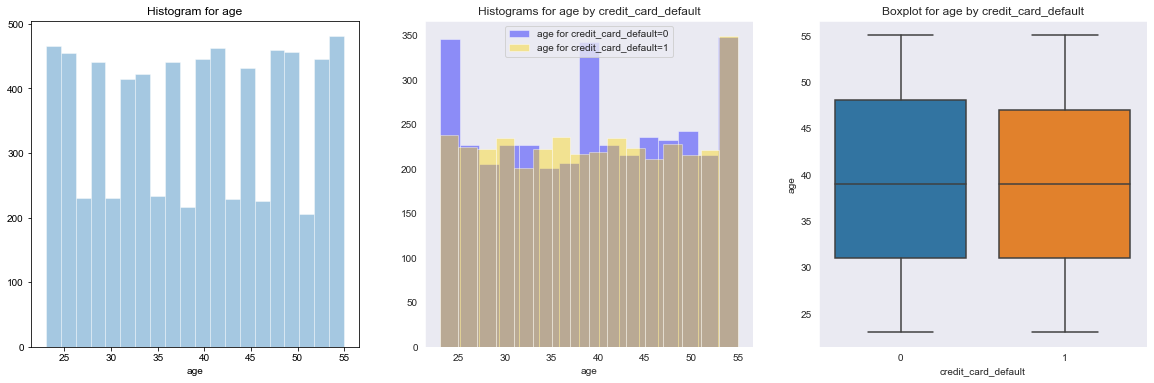

In [15]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for age")
sns.distplot(df['age'],kde=False)
plt.subplot(1,3,2)
sns.distplot(df['age'][df['credit_card_default']==0],kde=False,color="Blue", label="age for credit_card_default=0")
sns.distplot(df['age'][df['credit_card_default']==1],kde=False,color = "Gold", label = "age for credit_card_default=1")
plt.title("Histograms for age by credit_card_default")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df['credit_card_default'],y=df['age'])
plt.title("Boxplot for age by credit_card_default")

In [16]:
#df[['age', 'credit_card_default']].groupby(['age'], as_index=False).mean().sort_values(by='credit_card_default', ascending=False)

In [17]:
#df[['Pregnancies', 'Outcome']].groupby(['Pregnancies'], as_index=False).mean().sort_values(by='Outcome', ascending=False)
df['age_split'] = pd.qcut(df['age'], 5)
df[['age_split', 'credit_card_default']].groupby(['age_split'], as_index=False).mean().sort_values(by='age_split', ascending=True)

,age_split,credit_card_default
0,"(22.999, 29.0]",0.511613
1,"(29.0, 36.0]",0.500984
2,"(36.0, 42.0]",0.500746
3,"(42.0, 49.0]",0.496512
4,"(49.0, 55.0]",0.488595


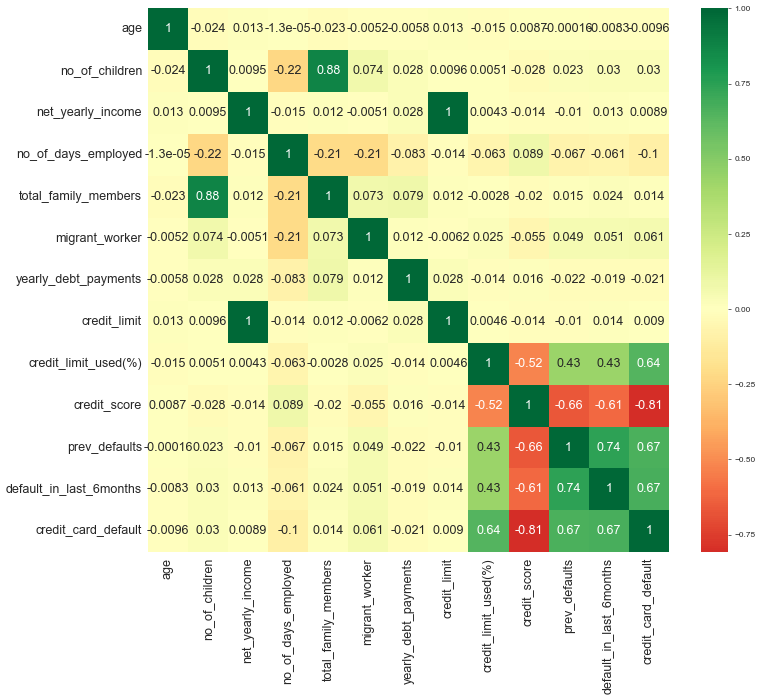

In [18]:
import seaborn as sns
plt.figure(figsize=(14,12), dpi= 60)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True, annot_kws={"size": 15})

# Decorations
#plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [18]:
test['gender'][(test['gender']=='M')]=0
test['gender'][(test['gender']=='F')]=1

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0.5, 1.0, 'Boxplot for gender by credit_card_default')

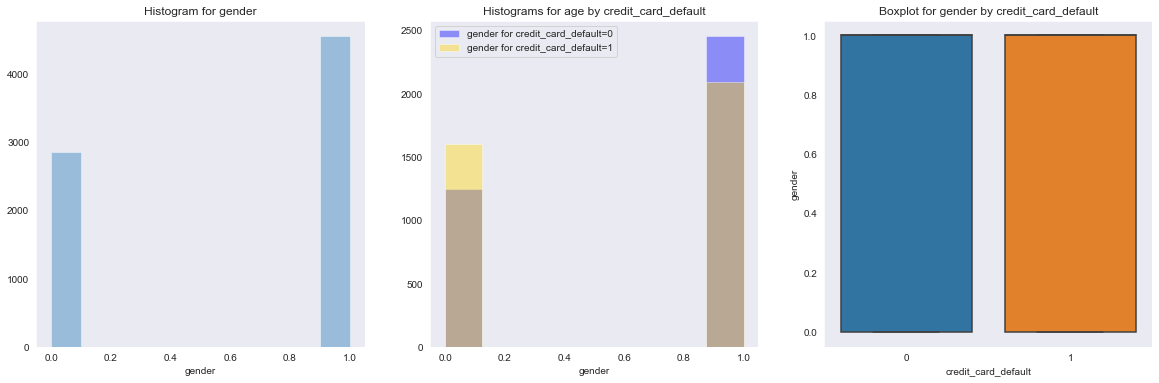

In [20]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for gender")
sns.distplot(df['gender'],kde=False)
plt.subplot(1,3,2)
sns.distplot(df['gender'][df['credit_card_default']==0],kde=False,color="Blue", label="gender for credit_card_default=0")
sns.distplot(df['gender'][df['credit_card_default']==1],kde=False,color = "Gold", label = "gender for credit_card_default=1")
plt.title("Histograms for age by credit_card_default")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df['credit_card_default'],y=df['gender'])
plt.title("Boxplot for gender by credit_card_default")

[Text(0, 0, '4547 (61%)'), Text(0, 0, '2847 (39%)')]

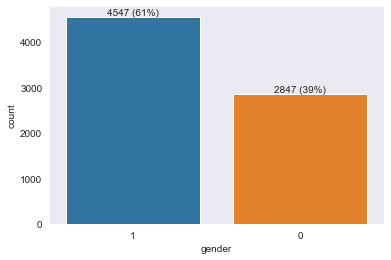

In [21]:
ax = sns.countplot(x=df['gender'],
                   order=df['gender'].value_counts(ascending=False).index);
        
abs_values = df['gender'].value_counts(ascending=False)
rel_values = df['gender'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

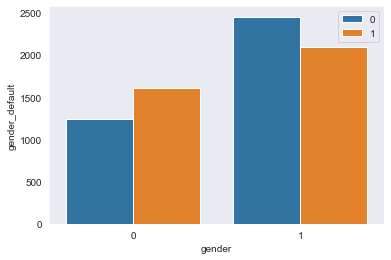

In [22]:
dfg = df.groupby(['gender','credit_card_default']).size().reset_index(name='gender_default')
sns.barplot(x='gender', y='gender_default', data=dfg, hue='credit_card_default')
plt.legend(loc='upper right');

In [23]:
df[['gender', 'credit_card_default']].groupby(['gender'], as_index=False).mean().sort_values(by='credit_card_default', ascending=False)

,gender,credit_card_default
0,0,0.563400
1,1,0.460303


F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


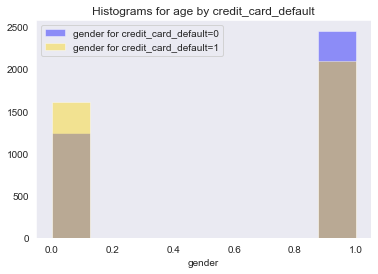

In [24]:
sns.distplot(df['gender'][df['credit_card_default']==0],kde=False,color="Blue", label="gender for credit_card_default=0")
sns.distplot(df['gender'][df['credit_card_default']==1],kde=False,color = "Gold", label = "gender for credit_card_default=1")
plt.title("Histograms for age by credit_card_default")
plt.legend()

In [19]:
test['owns_car'][(test['owns_car']=='N')]=0
test['owns_car'][(test['owns_car']=='Y')]=1

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0, '5031 (68%)'), Text(0, 0, '2363 (32%)')]

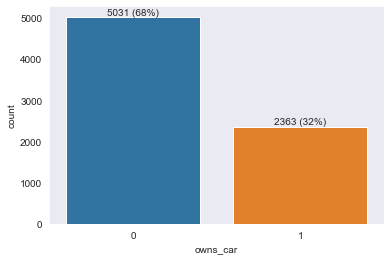

In [26]:
ax = sns.countplot(x=df['owns_car'],
                   order=df['owns_car'].value_counts(ascending=False).index);
        
abs_values = df['owns_car'].value_counts(ascending=False)
rel_values = df['owns_car'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


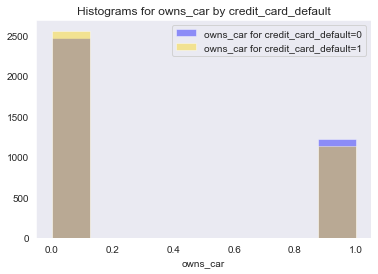

In [27]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot


sns.distplot(df['owns_car'][df['credit_card_default']==0],kde=False,color="Blue", label="owns_car for credit_card_default=0")
sns.distplot(df['owns_car'][df['credit_card_default']==1],kde=False,color = "Gold", label = "owns_car for credit_card_default=1")
plt.title("Histograms for owns_car by credit_card_default")
plt.legend()


In [28]:
df[['owns_car', 'credit_card_default']].groupby(['owns_car'], as_index=False).mean().sort_values(by='credit_card_default', ascending=False)

,owns_car,credit_card_default
0,0,0.508845
1,1,0.481168


In [20]:
test['owns_house'][(test['owns_house']=='N')]=0
test['owns_house'][(test['owns_house']=='Y')]=1

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0, '5139 (70%)'), Text(0, 0, '2255 (30%)')]

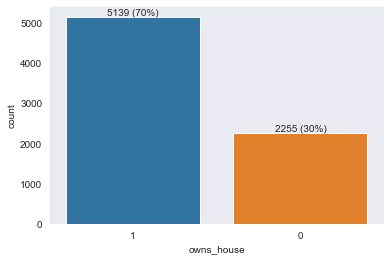

In [30]:
ax = sns.countplot(x=df['owns_house'],
                   order=df['owns_house'].value_counts(ascending=False).index);
        
abs_values = df['owns_house'].value_counts(ascending=False)
rel_values = df['owns_house'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


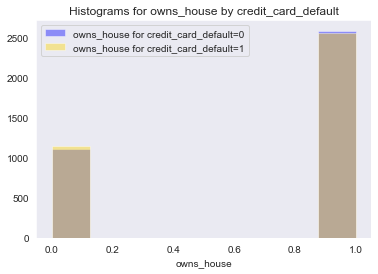

In [31]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot

sns.distplot(df['owns_house'][df['credit_card_default']==0],kde=False,color="Blue", label="owns_house for credit_card_default=0")
sns.distplot(df['owns_house'][df['credit_card_default']==1],kde=False,color = "Gold", label = "owns_house for credit_card_default=1")
plt.title("Histograms for owns_house by credit_card_default")
plt.legend()


In [32]:
df[['owns_house', 'credit_card_default']].groupby(['owns_house'], as_index=False).mean().sort_values(by='credit_card_default', ascending=False)

,owns_house,credit_card_default
0,0,0.506874
1,1,0.496984


F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0.5, 1.0, 'Boxplot for no_of_children by credit_card_default')

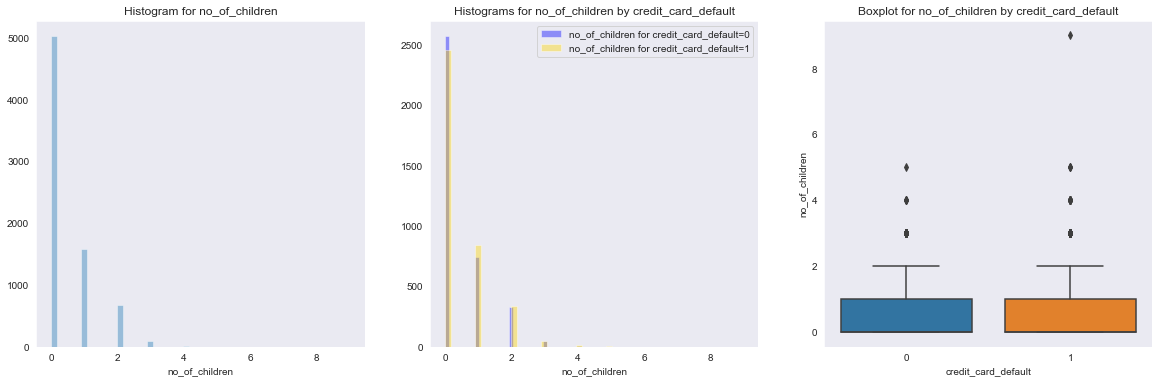

In [33]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for no_of_children")
sns.distplot(df['no_of_children'],kde=False)
plt.subplot(1,3,2)
sns.distplot(df['no_of_children'][df['credit_card_default']==0],kde=False,color="Blue", label="no_of_children for credit_card_default=0")
sns.distplot(df['no_of_children'][df['credit_card_default']==1],kde=False,color = "Gold", label = "no_of_children for credit_card_default=1")
plt.title("Histograms for no_of_children by credit_card_default")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df['credit_card_default'],y=df['no_of_children'])
plt.title("Boxplot for no_of_children by credit_card_default")

In [34]:
df[['no_of_children', 'credit_card_default']].groupby(['no_of_children'], as_index=False).mean().sort_values(by='credit_card_default', ascending=False)

,no_of_children,credit_card_default
6,9.0,1.000000
5,5.0,0.750000
4,4.0,0.733333
1,1.0,0.530677
2,2.0,0.506706
3,3.0,0.505051
0,0.0,0.488354


F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


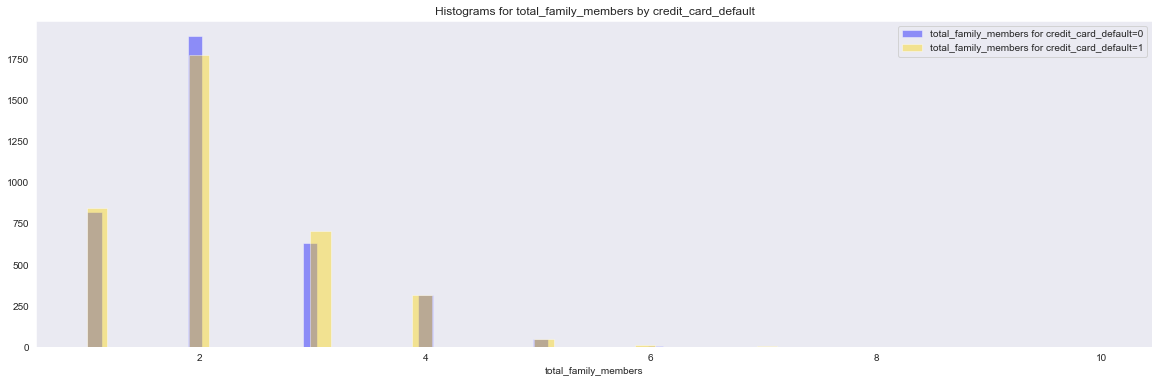

In [35]:
plt.figure(figsize=(20, 6))
sns.distplot(df['total_family_members'][df['credit_card_default']==0],kde=False,color="Blue", label="total_family_members for credit_card_default=0")
sns.distplot(df['total_family_members'][df['credit_card_default']==1],kde=False,color = "Gold", label = "total_family_members for credit_card_default=1")
plt.title("Histograms for total_family_members by credit_card_default")
plt.legend()

[Text(0, 0, '3656 (49%)'),
 Text(0, 0, '1662 (22%)'),
 Text(0, 0, '1334 (18%)'),
 Text(0, 0, '627 (8%)'),
 Text(0, 0, '96 (1%)'),
 Text(0, 0, '14 (0%)'),
 Text(0, 0, '4 (0%)'),
 Text(0, 0, '1 (0%)')]

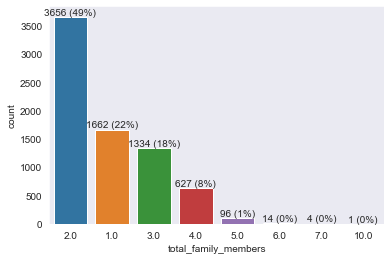

In [36]:
ax = sns.countplot(x=df['total_family_members'],
                   order=df['total_family_members'].value_counts(ascending=False).index);
        
abs_values = df['total_family_members'].value_counts(ascending=False)
rel_values = df['total_family_members'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

In [37]:
df[['total_family_members', 'credit_card_default']].groupby(['total_family_members'], as_index=False).mean().sort_values(by='credit_card_default', ascending=False)

,total_family_members,credit_card_default
7,10.0,1.000000
6,7.0,0.750000
5,6.0,0.714286
2,3.0,0.526987
4,5.0,0.510417
0,1.0,0.508424
3,4.0,0.502392
1,2.0,0.484409


In [38]:
df[['occupation_type', 'credit_card_default']].groupby(['occupation_type'], as_index=False).mean().sort_values(by='credit_card_default', ascending=False)

,occupation_type,credit_card_default
18,Waiters/barmen staff,0.700000
9,Low-skill Laborers,0.609195
16,Security staff,0.598870
8,Laborers,0.588113
4,Drivers,0.577338
1,Cleaning staff,0.575000
14,Sales staff,0.566131
2,Cooking staff,0.562842
5,HR staff,0.538462
13,Realty agents,0.500000


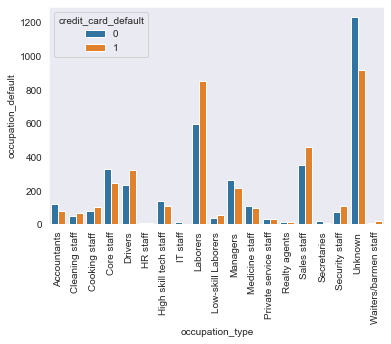

In [39]:
dfg = df.groupby(['occupation_type','credit_card_default']).size().reset_index(name='occupation_default')
ax = sns.barplot(x='occupation_type', y='occupation_default', data=dfg, hue='credit_card_default')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

## migrant_worker

[Text(0, 0, '5927 (80%)'), Text(0, 0, '1467 (20%)')]

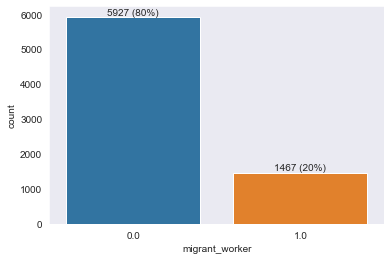

In [40]:
ax = sns.countplot(x=df['migrant_worker'],
                   order=df['migrant_worker'].value_counts(ascending=False).index);
        
abs_values = df['migrant_worker'].value_counts(ascending=False)
rel_values = df['migrant_worker'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

In [41]:
df[['migrant_worker', 'credit_card_default']].groupby(['migrant_worker'], as_index=False).mean().sort_values(by='credit_card_default', ascending=False)

,migrant_worker,credit_card_default
1,1.0,0.561009
0,0.0,0.484900


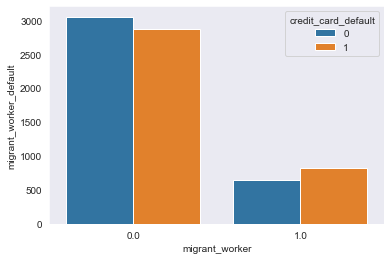

In [42]:
dfg = df.groupby(['migrant_worker','credit_card_default']).size().reset_index(name='migrant_worker_default')
ax = sns.barplot(x='migrant_worker', y='migrant_worker_default', data=dfg, hue='credit_card_default')
ax.set_xticklabels(ax.get_xticklabels());

## occupation_type 

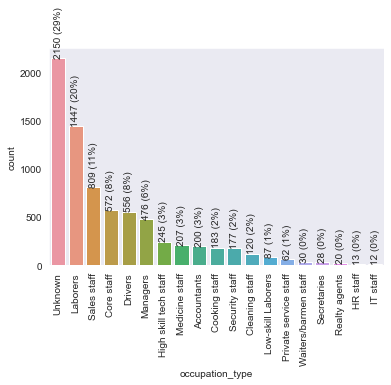

In [43]:
ax = sns.countplot(x=df['occupation_type'],
                   order=df['occupation_type'].value_counts(ascending=False).index);
        
abs_values = df['occupation_type'].value_counts(ascending=False)
rel_values = df['occupation_type'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls,rotation = 90)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

## net_yearly_income 

In [44]:
df[['net_yearly_income', 'credit_card_default']].groupby(['net_yearly_income'], as_index=False).mean().sort_values(by='credit_card_default', ascending=False)

,net_yearly_income,credit_card_default
0,27170.61,1.0
4022,178383.22,1.0
4032,178729.70,1.0
4030,178619.13,1.0
4029,178584.33,1.0
...,...,...
1438,113516.00,0.0
4370,191165.26,0.0
4371,191193.83,0.0
1435,113386.78,0.0


In [45]:
#df[['Pregnancies', 'Outcome']].groupby(['Pregnancies'], as_index=False).mean().sort_values(by='Outcome', ascending=False)
df['net_yearly_income_split'] = pd.qcut(df['net_yearly_income'], 9)
df[['net_yearly_income_split', 'credit_card_default']].groupby(['net_yearly_income_split'], as_index=False).mean().sort_values(by='net_yearly_income_split', ascending=True)

,net_yearly_income_split,credit_card_default
0,"(27170.609, 96221.896]",0.492701
1,"(96221.896, 119513.008]",0.514007
2,"(119513.008, 140889.143]",0.530414
3,"(140889.143, 160298.029]",0.521315
4,"(160298.029, 181807.407]",0.513382
5,"(181807.407, 208723.937]",0.520097
6,"(208723.937, 244693.283]",0.514599
7,"(244693.283, 298391.983]",0.450670
8,"(298391.983, 140759012.73]",0.442822


F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0.5, 1.0, 'Boxplot for net_yearly_income by credit_card_default')

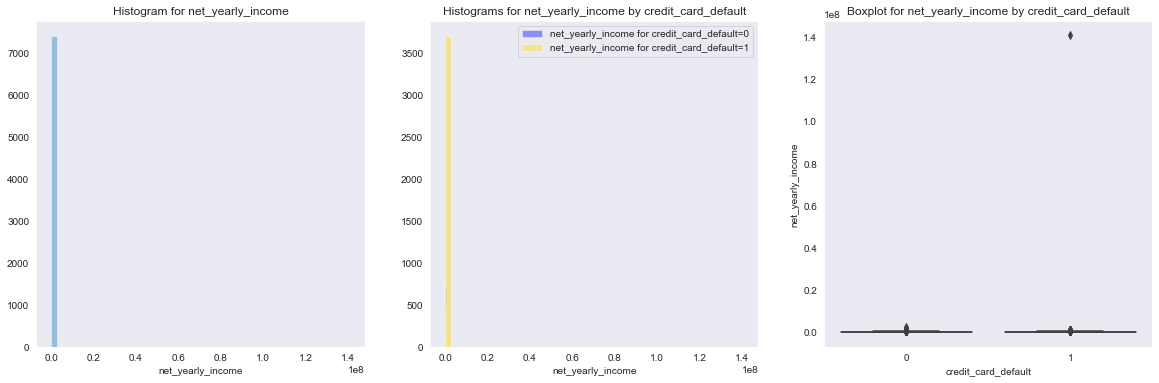

In [46]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for net_yearly_income")
sns.distplot(df['net_yearly_income'],kde=False)
plt.subplot(1,3,2)
sns.distplot(df['net_yearly_income'][df['credit_card_default']==0],kde=False,color="Blue", label="net_yearly_income for credit_card_default=0")
sns.distplot(df['net_yearly_income'][df['credit_card_default']==1],kde=False,color = "Gold", label = "net_yearly_income for credit_card_default=1")
plt.title("Histograms for net_yearly_income by credit_card_default")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df['credit_card_default'],y=df['net_yearly_income'])
plt.title("Boxplot for net_yearly_income by credit_card_default")

##  yearly_debt_payments

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0.5, 1.0, 'Boxplot for yearly_debt_payments by credit_card_default')

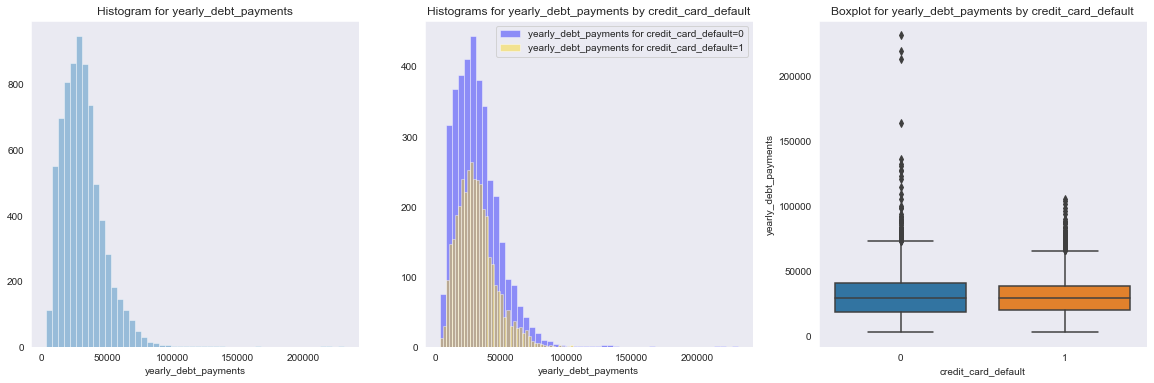

In [47]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for yearly_debt_payments")
sns.distplot(df['yearly_debt_payments'],kde=False)
plt.subplot(1,3,2)
sns.distplot(df['yearly_debt_payments'][df['credit_card_default']==0],kde=False,color="Blue", label="yearly_debt_payments for credit_card_default=0")
sns.distplot(df['yearly_debt_payments'][df['credit_card_default']==1],kde=False,color = "Gold", label = "yearly_debt_payments for credit_card_default=1")
plt.title("Histograms for yearly_debt_payments by credit_card_default")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df['credit_card_default'],y=df['yearly_debt_payments'])
plt.title("Boxplot for yearly_debt_payments by credit_card_default")

In [48]:
#df[['Pregnancies', 'Outcome']].groupby(['Pregnancies'], as_index=False).mean().sort_values(by='Outcome', ascending=False)
df['yearly_debt_payments_split'] = pd.qcut(df['yearly_debt_payments'], 10)
df[['yearly_debt_payments_split', 'credit_card_default']].groupby(['yearly_debt_payments_split'], as_index=False).mean().sort_values(by='yearly_debt_payments_split', ascending=True)

,yearly_debt_payments_split,credit_card_default
0,"(3256.3289999999997, 12944.139]",0.422973
1,"(12944.139, 17651.964]",0.469553
2,"(17651.964, 21782.251]",0.542625
3,"(21782.251, 25671.71]",0.521622
4,"(25671.71, 29137.605]",0.546433
5,"(29137.605, 33022.442]",0.515646
6,"(33022.442, 37231.22]",0.544595
7,"(37231.22, 42717.414]",0.526387
8,"(42717.414, 51747.284]",0.470907
9,"(51747.284, 231222.57]",0.439189


## no_of_days_employed 

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0.5, 1.0, 'Boxplot for no_of_days_employed by credit_card_default')

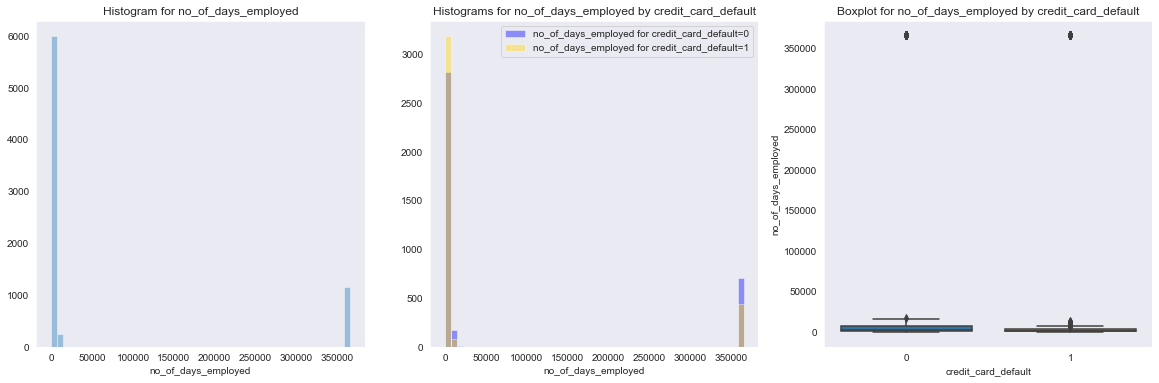

In [49]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for no_of_days_employed")
sns.distplot(df['no_of_days_employed'],kde=False)
plt.subplot(1,3,2)
sns.distplot(df['no_of_days_employed'][df['credit_card_default']==0],kde=False,color="Blue", label="no_of_days_employed for credit_card_default=0")
sns.distplot(df['no_of_days_employed'][df['credit_card_default']==1],kde=False,color = "Gold", label = "no_of_days_employed for credit_card_default=1")
plt.title("Histograms for no_of_days_employed by credit_card_default")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df['credit_card_default'],y=df['no_of_days_employed'])
plt.title("Boxplot for no_of_days_employed by credit_card_default")

In [50]:
#df[['Pregnancies', 'Outcome']].groupby(['Pregnancies'], as_index=False).mean().sort_values(by='Outcome', ascending=False)
df['no_of_days_employed_split'] = pd.qcut(df['no_of_days_employed'], 6)
df[['no_of_days_employed_split', 'credit_card_default']].groupby(['no_of_days_employed_split'], as_index=False).mean().sort_values(by='no_of_days_employed_split', ascending=True)

,no_of_days_employed_split,credit_card_default
0,"(-0.001, 527.0]",0.608590
1,"(527.0, 1073.333]",0.593014
2,"(1073.333, 1813.0]",0.539335
3,"(1813.0, 3179.0]",0.499188
4,"(3179.0, 9895.333]",0.387490
5,"(9895.333, 365252.0]",0.372263


In [51]:
df[['no_of_days_employed', 'credit_card_default']].groupby(['no_of_days_employed'], as_index=False).mean().sort_values(by='credit_card_default', ascending=False)

,no_of_days_employed,credit_card_default
0,0.0,1.0
1789,2198.0,1.0
1815,2243.0,1.0
1811,2236.0,1.0
1809,2234.0,1.0
...,...,...
2205,2932.0,0.0
2204,2929.0,0.0
2203,2927.0,0.0
2202,2925.0,0.0


## credit_limit 

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0.5, 1.0, 'Boxplot for credit_limit by credit_card_default')

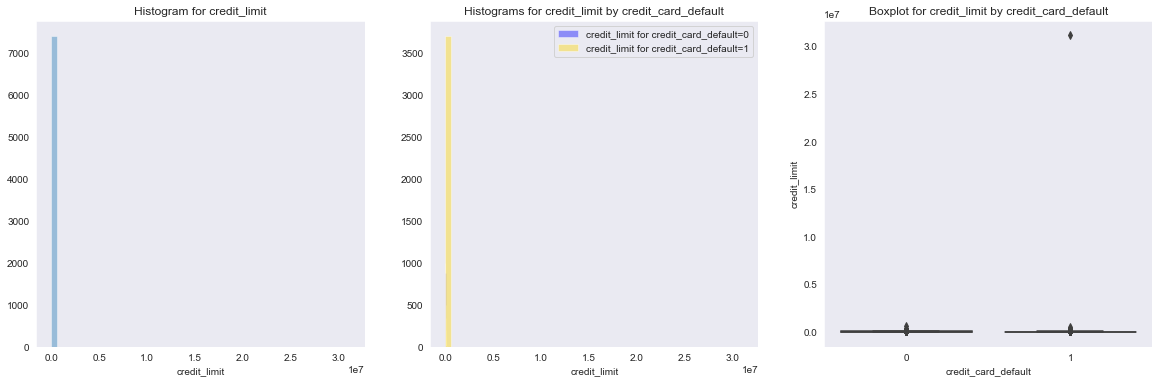

In [52]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for credit_limit")
sns.distplot(df['credit_limit'],kde=False)
plt.subplot(1,3,2)
sns.distplot(df['credit_limit'][df['credit_card_default']==0],kde=False,color="Blue", label="credit_limit for credit_card_default=0")
sns.distplot(df['credit_limit'][df['credit_card_default']==1],kde=False,color = "Gold", label = "credit_limit for credit_card_default=1")
plt.title("Histograms for credit_limit by credit_card_default")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df['credit_card_default'],y=df['credit_limit'])
plt.title("Boxplot for credit_limit by credit_card_default")

In [53]:
#sns.histplot(data=df, x='credit_card_default', hue='credit_limit', multiple='stack');

In [54]:
#df[['Pregnancies', 'Outcome']].groupby(['Pregnancies'], as_index=False).mean().sort_values(by='Outcome', ascending=False)
df['credit_limit_split'] = pd.qcut(df['credit_limit'], 4)
df[['credit_limit_split', 'credit_card_default']].groupby(['credit_limit_split'], as_index=False).mean().sort_values(by='credit_limit_split', ascending=True)

,credit_limit_split,credit_card_default
0,"(4003.1389999999997, 23947.618]",0.501893
1,"(23947.618, 35494.655]",0.511364
2,"(35494.655, 52856.995]",0.517857
3,"(52856.995, 31129970.49]",0.468902


## credit_limit_used(%)	

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0.5, 1.0, 'Boxplot for credit_limit_used(%) by credit_card_default')

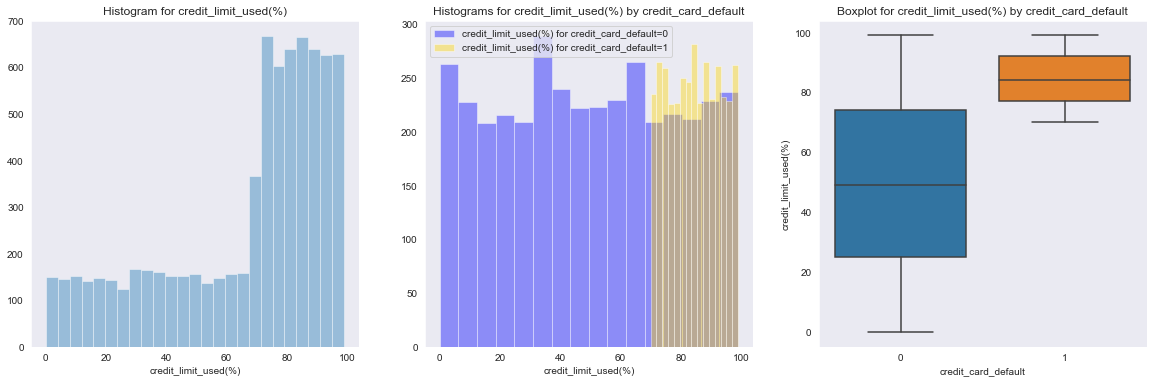

In [55]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for credit_limit_used(%)")
sns.distplot(df['credit_limit_used(%)'],kde=False)
plt.subplot(1,3,2)
sns.distplot(df['credit_limit_used(%)'][df['credit_card_default']==0],kde=False,color="Blue", label="credit_limit_used(%) for credit_card_default=0")
sns.distplot(df['credit_limit_used(%)'][df['credit_card_default']==1],kde=False,color = "Gold", label = "credit_limit_used(%) for credit_card_default=1")
plt.title("Histograms for credit_limit_used(%) by credit_card_default")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df['credit_card_default'],y=df['credit_limit_used(%)'])
plt.title("Boxplot for credit_limit_used(%) by credit_card_default")

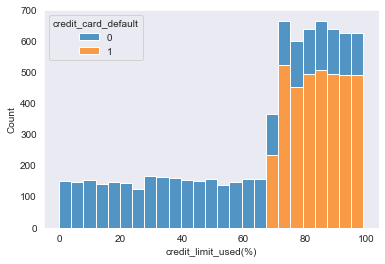

In [56]:
sns.histplot(data=df, x='credit_limit_used(%)', hue='credit_card_default', multiple='stack');

In [57]:
#df[['Pregnancies', 'Outcome']].groupby(['Pregnancies'], as_index=False).mean().sort_values(by='Outcome', ascending=False)
df['credit_limit_used(%)_split'] = pd.qcut(df['credit_limit_used(%)'], 3)
df[['credit_limit_used(%)_split', 'credit_card_default']].groupby(['credit_limit_used(%)_split'], as_index=False).mean().sort_values(by='credit_limit_used(%)_split', ascending=True)

,credit_limit_used(%)_split,credit_card_default
0,"(-0.001, 65.0]",0.000000
1,"(65.0, 84.0]",0.733728
2,"(84.0, 99.0]",0.772498


## credit_score 

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0.5, 1.0, 'Boxplot for credit_score by credit_card_default')

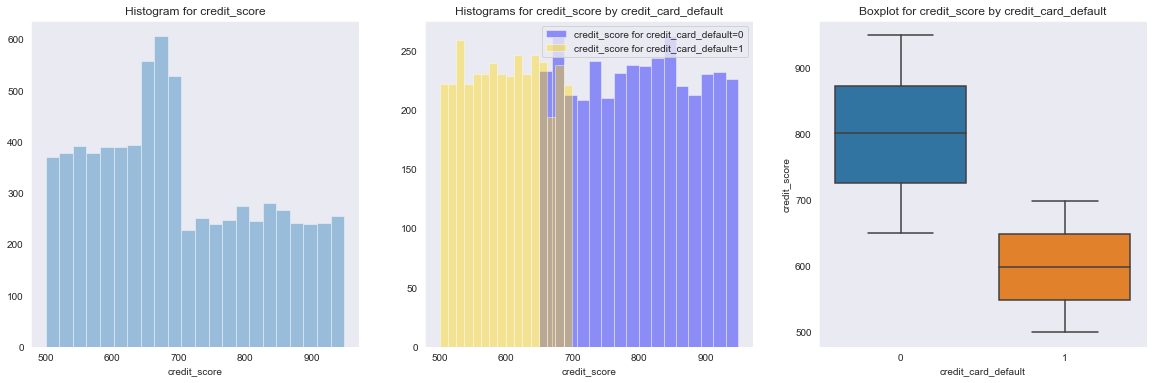

In [58]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for credit_score")
sns.distplot(df['credit_score'],kde=False)
plt.subplot(1,3,2)
sns.distplot(df['credit_score'][df['credit_card_default']==0],kde=False,color="Blue", label="credit_score for credit_card_default=0")
sns.distplot(df['credit_score'][df['credit_card_default']==1],kde=False,color = "Gold", label = "credit_score for credit_card_default=1")
plt.title("Histograms for credit_score by credit_card_default")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df['credit_card_default'],y=df['credit_score'])
plt.title("Boxplot for credit_score by credit_card_default")

In [59]:
#df[['Pregnancies', 'Outcome']].groupby(['Pregnancies'], as_index=False).mean().sort_values(by='Outcome', ascending=False)
df['credit_score_split'] = pd.qcut(df['credit_score'], 5)
df[['credit_score_split', 'credit_card_default']].groupby(['credit_score_split'], as_index=False).mean().sort_values(by='credit_score_split', ascending=True)

,credit_score_split,credit_card_default
0,"(499.999, 580.0]",1.000000
1,"(580.0, 654.0]",0.958700
2,"(654.0, 709.0]",0.534565
3,"(709.0, 830.0]",0.000000
4,"(830.0, 949.0]",0.000000


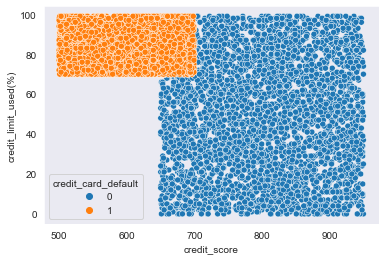

In [60]:
sns.scatterplot(data=df, x='credit_score', y='credit_limit_used(%)', hue='credit_card_default');

##  prev_defaults

In [61]:
df[['prev_defaults', 'credit_card_default']].groupby(['prev_defaults'], as_index=False).mean().sort_values(by='credit_card_default', ascending=False)

,prev_defaults,credit_card_default
1,1,1.000000
2,2,1.000000
0,0,0.249492


F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0.5, 1.0, 'Boxplot for prev_defaults by credit_card_default')

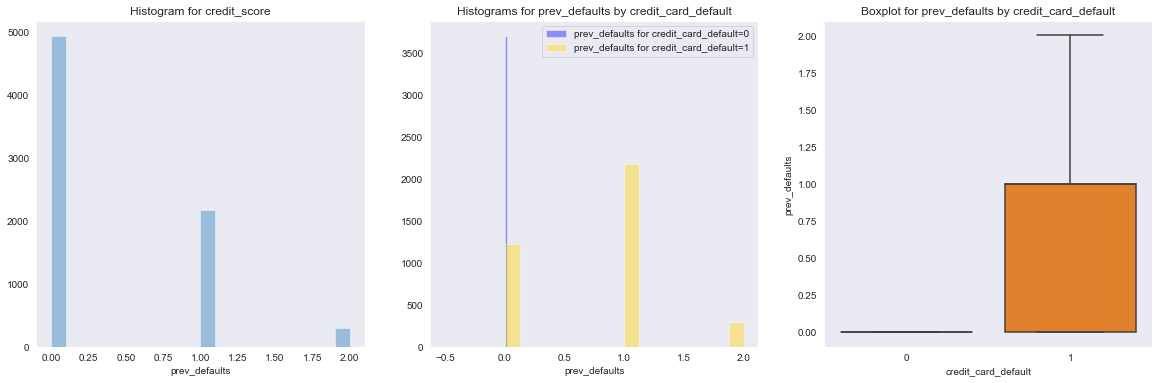

In [62]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for credit_score")
sns.distplot(df['prev_defaults'],kde=False)
plt.subplot(1,3,2)
sns.distplot(df['prev_defaults'][df['credit_card_default']==0],kde=False,color="Blue", label="prev_defaults for credit_card_default=0")
sns.distplot(df['prev_defaults'][df['credit_card_default']==1],kde=False,color = "Gold", label = "prev_defaults for credit_card_default=1")
plt.title("Histograms for prev_defaults by credit_card_default")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df['credit_card_default'],y=df['prev_defaults'])
plt.title("Boxplot for prev_defaults by credit_card_default")

[Text(0, 0, '4926 (67%)'), Text(0, 0, '2172 (29%)'), Text(0, 0, '296 (4%)')]

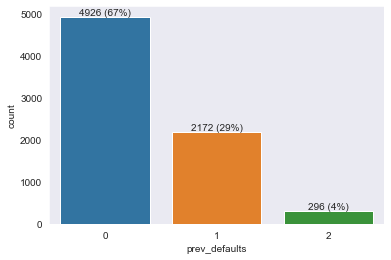

In [63]:
ax = sns.countplot(x=df['prev_defaults'],
                   order=df['prev_defaults'].value_counts(ascending=False).index);
        
abs_values = df['prev_defaults'].value_counts(ascending=False)
rel_values = df['prev_defaults'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

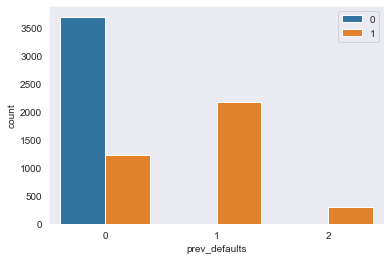

In [64]:
dfg = df.groupby(['prev_defaults','credit_card_default']).size().reset_index(name='count')
sns.barplot(x='prev_defaults', y='count', data=dfg, hue='credit_card_default')
plt.legend(loc='upper right');

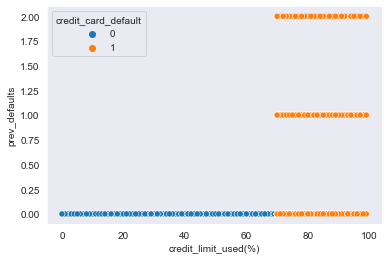

In [65]:
sns.scatterplot(data=df, x='credit_limit_used(%)', y='prev_defaults', hue='credit_card_default');

## default_in_last_6months 

[Text(0, 0, '5093 (69%)'), Text(0, 0, '2301 (31%)')]

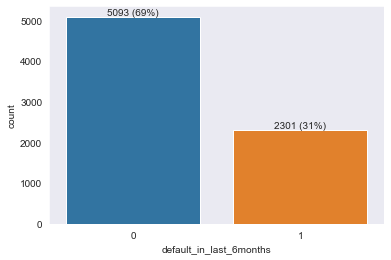

In [66]:
ax = sns.countplot(x=df['default_in_last_6months'],
                   order=df['default_in_last_6months'].value_counts(ascending=False).index);
        
abs_values = df['default_in_last_6months'].value_counts(ascending=False)
rel_values = df['default_in_last_6months'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

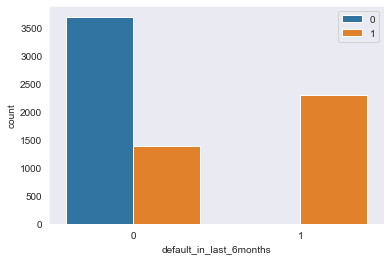

In [67]:
dfg = df.groupby(['default_in_last_6months','credit_card_default']).size().reset_index(name='count')
sns.barplot(x='default_in_last_6months', y='count', data=dfg, hue='credit_card_default')
plt.legend(loc='upper right');

In [68]:
df[['default_in_last_6months', 'credit_card_default']].groupby(['default_in_last_6months'], as_index=False).mean().sort_values(by='credit_card_default', ascending=False)

,default_in_last_6months,credit_card_default
1,1,1.000000
0,0,0.274102


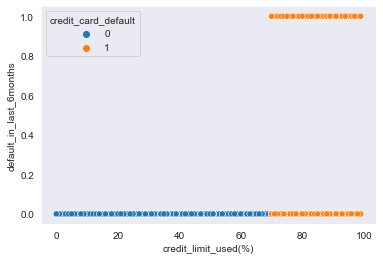

In [69]:
sns.scatterplot(data=df, x='credit_limit_used(%)', y='default_in_last_6months', hue='credit_card_default');

In [21]:
test[(test['credit_limit_used(%)'] > 68) & (test['credit_score'] < 700)]['credit_card_default'].value_counts()

1    3696
0    2211
Name: credit_card_default, dtype: int64

In [71]:
df = pd.read_csv('df.csv')
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_147263,Baldwin,25,F,N,N,0.0,435928.11,641.0,Managers,1.0,1.0,67425.06,140558.16,87,729.0,0,0,0
1,CST_134196,Matthias,34,F,N,N,0.0,394967.77,7380.0,Sales staff,2.0,0.0,66814.80,92461.97,20,761.0,0,0,0
2,CST_157744,Lawder,41,M,Y,Y,2.0,203365.64,246.0,Laborers,4.0,0.0,16082.96,53216.26,54,878.0,0,0,0
3,CST_165801,Blenkinsop,40,F,N,Y,0.0,489093.26,365243.0,Unknown,1.0,0.0,35375.43,162770.74,36,941.0,0,0,0
4,CST_162891,Wildau,48,M,N,Y,0.0,389602.71,365247.0,Unknown,2.0,0.0,73871.06,91830.51,59,853.0,0,0,0


In [190]:
values = {'owns_car': 'N', 'no_of_children': 0, 'migrant_worker': 0, 'total_family_members': 1, 'no_of_days_employed': 0}
df.fillna(value = values, inplace = True)

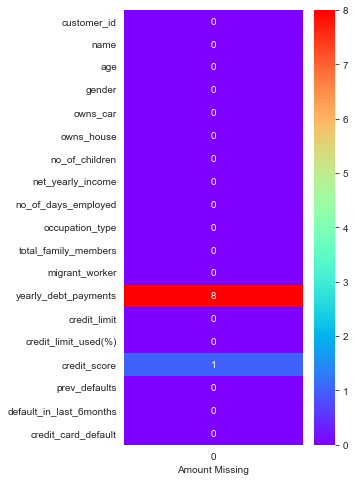

In [191]:
plt.figure(figsize=(4, 8))
ax = sns.heatmap(df.isnull().sum().to_frame(), annot=True, fmt = 'd', cmap = 'rainbow')
ax.set_xlabel('Amount Missing');

In [22]:
test.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,1,0,1,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,0,0,1,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,0,0,1,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,1,0,1,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,0,1,1,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [195]:
df['gender'][(df['gender']=='M')]=0
df['gender'][(df['gender']=='F')]=1
df['owns_car'][(df['owns_car']=='N')]=0
df['owns_car'][(df['owns_car']=='Y')]=1
df['owns_house'][(df['owns_house']=='N')]=0
df['owns_house'][(df['owns_house']=='Y')]=1

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\Anac

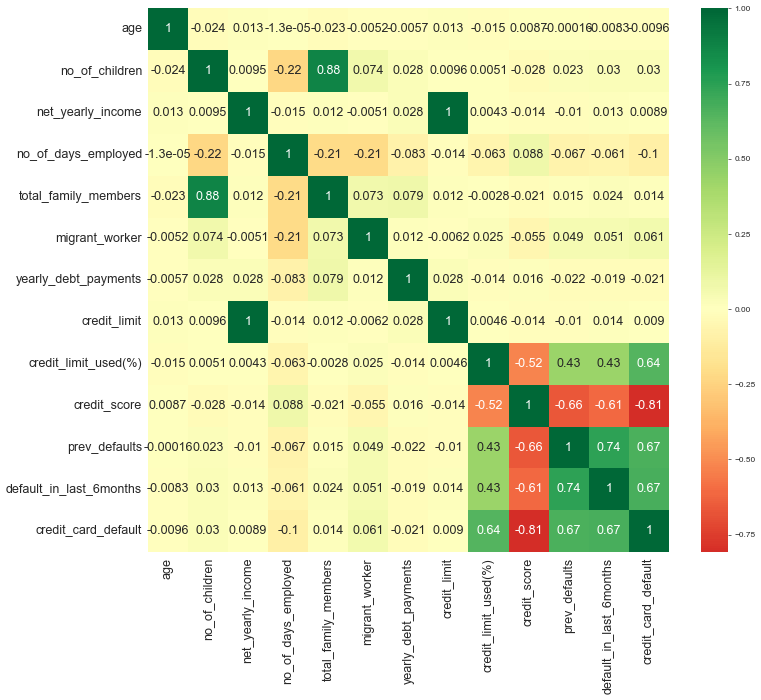

In [76]:
import seaborn as sns
plt.figure(figsize=(14,12), dpi= 60)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True, annot_kws={"size": 15})

# Decorations
#plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [23]:
test.drop(['customer_id', 'name'], inplace = True, axis = 1)

In [178]:
df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,25,1,0,0,0.0,435928.11,641.0,Managers,1.0,1.0,67425.06,140558.16,87,729.0,0,0,0
1,34,1,0,0,0.0,394967.77,7380.0,Sales staff,2.0,0.0,66814.80,92461.97,20,761.0,0,0,0
2,41,0,1,1,2.0,203365.64,246.0,Laborers,4.0,0.0,16082.96,53216.26,54,878.0,0,0,0
3,40,1,0,1,0.0,489093.26,365243.0,Unknown,1.0,0.0,35375.43,162770.74,36,941.0,0,0,0
4,48,0,0,1,0.0,389602.71,365247.0,Unknown,2.0,0.0,73871.06,91830.51,59,853.0,0,0,0


In [25]:
def func(row):
    if (row['credit_limit_used(%)'] >70) & (row['credit_score']<700):
        val = 1
    else:
        val = 0
    return val

test['default_chance'] = test.apply(func, axis=1) 

In [26]:
test = test[['age', 'gender', 'owns_car', 'owns_house', 'no_of_children', 'net_yearly_income', 'no_of_days_employed', 
        'occupation_type','total_family_members', 'migrant_worker', 'yearly_debt_payments', 'credit_limit', 
        'credit_limit_used(%)', 'credit_score', 'prev_defaults', 'default_in_last_6months', 'default_chance','credit_card_default']]

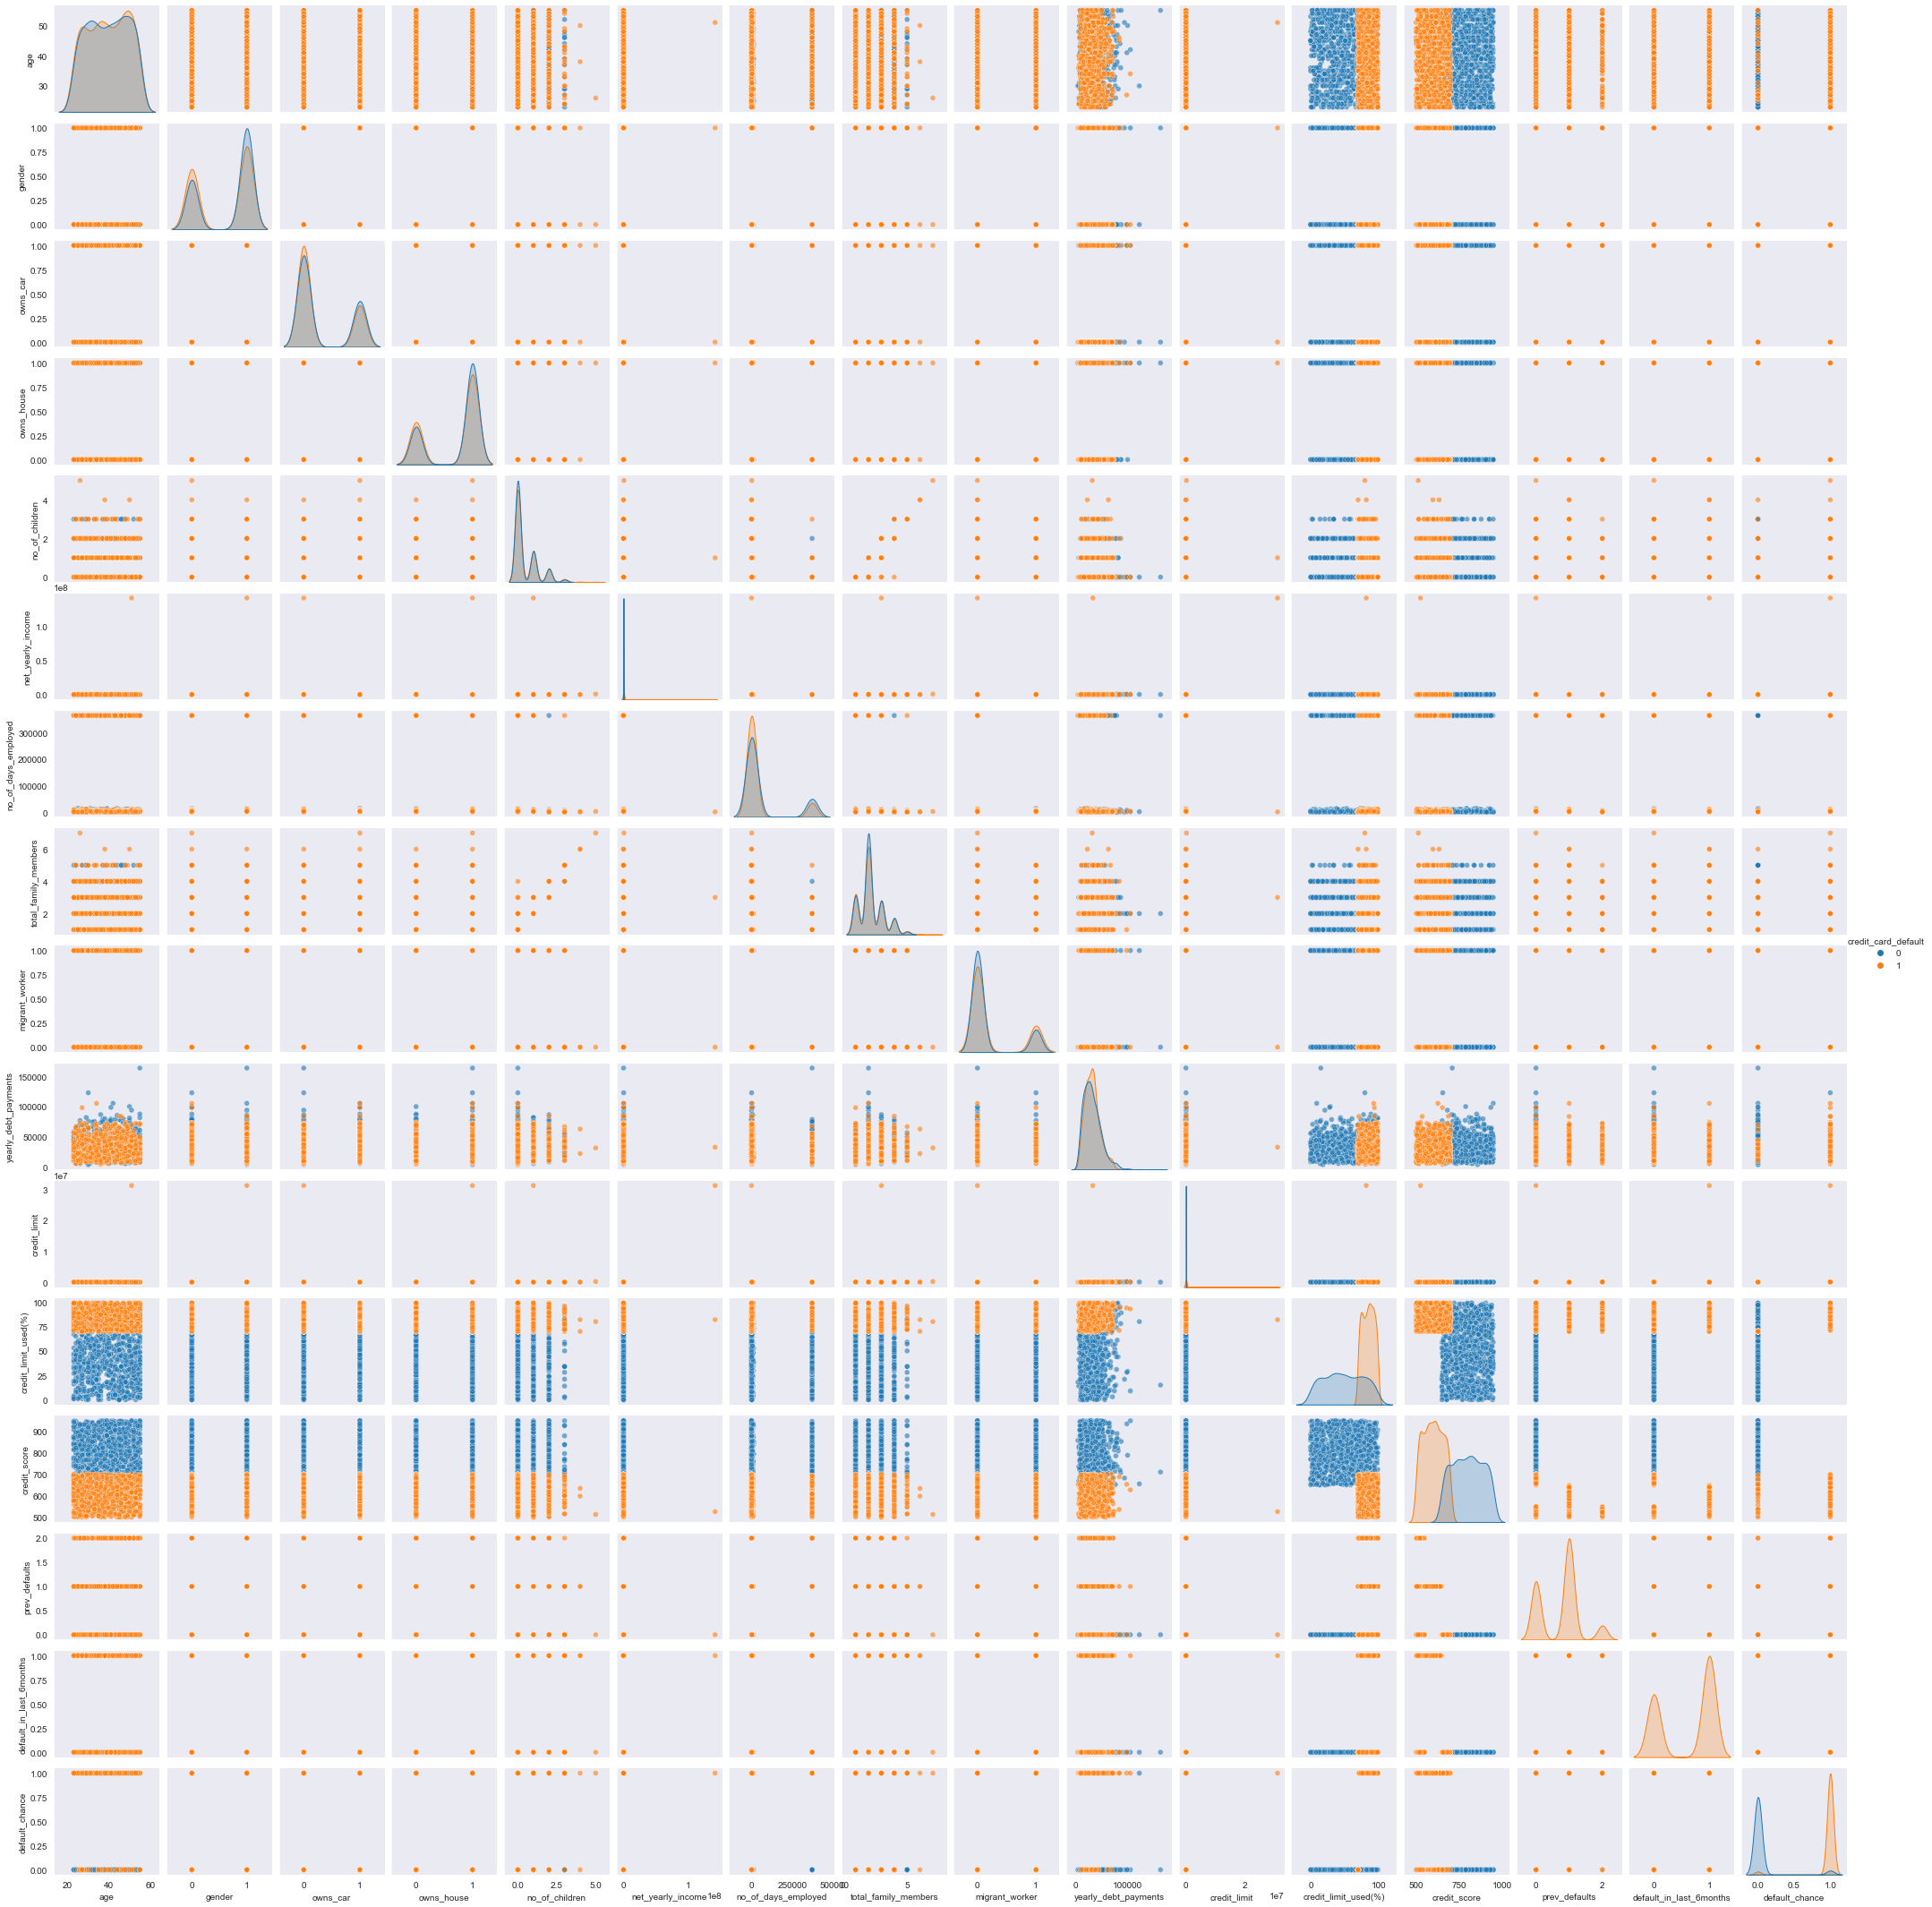

In [81]:
df_sample = df.groupby('credit_card_default', group_keys=False).apply(lambda x: x.sample(1000))
g = sns.pairplot(df_sample, hue='credit_card_default', plot_kws={'alpha':0.6})
g.fig.set_size_inches(30,30)

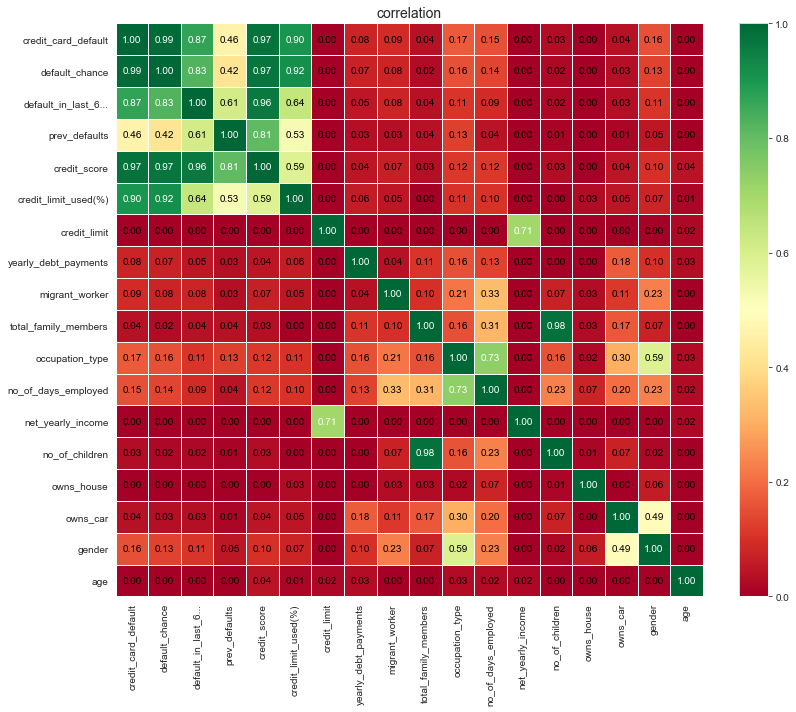

In [82]:
categorical = list(df.select_dtypes(include ='object').columns)
numerical = list(df.drop('credit_card_default', axis = 1).select_dtypes(include =['int64', 'float64']).columns)
coerr_mat = df.phik_matrix(interval_cols = numerical + ['credit_card_default'])
cmap = sns.diverging_palette(22, 10, as_cmap='RdYlGn')

plot_correlation_matrix(coerr_mat.values, x_labels=coerr_mat.columns, y_labels=coerr_mat.index, 
                        vmin=0, vmax=1, color_map='RdYlGn', figsize=(12, 10));
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [201]:
class GraphVisualization:
    def __init__(self):
        self.visual = []
      
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
    
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        for i in list(G.nodes()):
            G.nodes[i]['corr_target'] = coerr_mat['credit_card_default'][i]        
        node_color = [20 * nx.get_node_attributes(G, 'corr_target')[v] for v in G]
        nx.draw_shell(G, node_size=2750, node_color = node_color, alpha = 0.7, with_labels = True, edge_color ='0', cmap = cmap, font_size=9)
        plt.figure(figsize=(10, 10))
        plt.show()

In [202]:
G = GraphVisualization()
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2 and col1 != 'credit_card_default' and col2 != 'credit_card_default':
            if coerr_mat[col1][col2] > 0.7:
                G.addEdge(col1,col2)

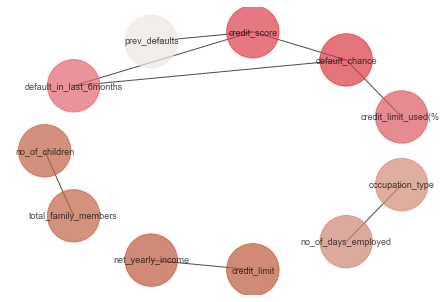

<Figure size 720x720 with 0 Axes>

In [203]:
G.visualize();

In [27]:
test.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,default_chance,credit_card_default
0,46,1,0,1,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,1
1,29,0,0,1,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,0
2,37,0,0,1,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,0
3,39,1,0,1,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,0
4,46,0,1,1,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,0


In [87]:
from scipy import stats
## retrieving p value from normality test function
agePVAL=stats.normaltest(df['age']).pvalue
genderPVAL=stats.normaltest(df['gender']).pvalue
owns_carPVAL=stats.normaltest(df['owns_car']).pvalue
owns_housePVAL=stats.normaltest(df['owns_house']).pvalue
no_of_childrenPVAL=stats.normaltest(df['no_of_children']).pvalue
net_yearly_incomePVAL=stats.normaltest(df['net_yearly_income']).pvalue
no_of_days_employedPVAL=stats.normaltest(df['no_of_days_employed']).pvalue
total_family_membersPVAL=stats.normaltest(df['total_family_members']).pvalue
## Printing the values
print("age P Value is ", round(agePVAL,5))
print("gender P Value is " + str(genderPVAL))
print("owns_car P Value is " + str(owns_carPVAL))
print("owns_house P Value is " + str(owns_housePVAL))
print("no_of_children P Value is " + str(no_of_childrenPVAL))
print("net_yearly_income P Value is " + str(net_yearly_incomePVAL))
print("no_of_days_employed P Value is " + str(no_of_days_employedPVAL))
print("total_family_members P Value is " + str(total_family_membersPVAL))

age P Value is  0.0
gender P Value is 0.0
owns_car P Value is 0.0
owns_house P Value is 0.0
no_of_children P Value is 0.0
net_yearly_income P Value is 0.0
no_of_days_employed P Value is 0.0
total_family_members P Value is 1.4580107346398604e-223


In [28]:
from sklearn.preprocessing import LabelEncoder
lm = LabelEncoder()

# get categorical columns
cat_cols = test.select_dtypes(include=['object']).columns

# encode labels for categorical columns
for i in cat_cols:
    test[i] = lm.fit_transform(test[i])
    
test.head()

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [186]:
from sklearn.preprocessing import MinMaxScaler


#def scale(df):
#    scale = MinMaxScaler()
#    df = scale.fit_transform(df)
#    return df
#df = pd.DataFrame(scale(df),columns= df.columns)
#df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,default_chance,credit_card_default
0,0.06250,1.0,0.0,0.0,0.000000,0.002905,0.001755,0.555556,0.000000,1.0,0.281483,0.004387,0.878788,0.510022,0.0,0.0,0.0,0.0
1,0.34375,1.0,0.0,0.0,0.000000,0.002613,0.020205,0.777778,0.111111,0.0,0.278807,0.002842,0.202020,0.581292,0.0,0.0,0.0,0.0
2,0.56250,0.0,1.0,1.0,0.222222,0.001252,0.000674,0.444444,0.333333,0.0,0.056265,0.001581,0.545455,0.841871,0.0,0.0,0.0,0.0
3,0.53125,1.0,0.0,1.0,0.000000,0.003282,0.999975,0.944444,0.000000,0.0,0.140894,0.005101,0.363636,0.982183,0.0,0.0,0.0,0.0
4,0.78125,0.0,0.0,1.0,0.000000,0.002575,0.999986,0.944444,0.111111,0.0,0.309760,0.002822,0.595960,0.786192,0.0,0.0,0.0,0.0


In [303]:
# split train-test data
from sklearn.model_selection import train_test_split
X = df.drop(['credit_card_default'], axis=1)
y = df['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)

print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (5175, 17) (2219, 17)
y= (5175,) (2219,)


In [315]:
X.to_csv('X.csv', index=False)

In [316]:
y.to_csv('y.csv', index=False)

In [304]:
X.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,default_chance
0,25,1,0,0,0.0,435928.11,641.0,10,1.0,1.0,67425.06,140558.16,87,729.0,0,0,0
1,34,1,0,0,0.0,394967.77,7380.0,14,2.0,0.0,66814.80,92461.97,20,761.0,0,0,0
2,41,0,1,1,2.0,203365.64,246.0,8,4.0,0.0,16082.96,53216.26,54,878.0,0,0,0
3,40,1,0,1,0.0,489093.26,365243.0,17,1.0,0.0,35375.43,162770.74,36,941.0,0,0,0
4,48,0,0,1,0.0,389602.71,365247.0,17,2.0,0.0,73871.06,91830.51,59,853.0,0,0,0


# start

In [6]:
X_train = pd.read_csv('X.csv')
y_train = pd.read_csv('y.csv')

In [7]:
test = pd.read_csv('train.csv')

In [8]:
test.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [29]:
test.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,default_chance,credit_card_default
0,46,1,0,1,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,1
1,29,0,0,1,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,0
2,37,0,0,1,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,0
3,39,1,0,1,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,0
4,46,0,1,1,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,0


In [31]:
X_test = test[['net_yearly_income', 'no_of_days_employed', 
        'yearly_debt_payments', 'credit_limit', 
        'credit_limit_used(%)', 'credit_score']]
y_test = test[['credit_card_default']]

In [32]:
X_train = X[['net_yearly_income', 'no_of_days_employed', 
        'yearly_debt_payments', 'credit_limit', 
        'credit_limit_used(%)', 'credit_score']]
y_train = y_train

In [33]:
X_train.head()

,net_yearly_income,no_of_days_employed,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score
0,435928.11,641.0,67425.06,140558.16,87,729.0
1,394967.77,7380.0,66814.80,92461.97,20,761.0
2,203365.64,246.0,16082.96,53216.26,54,878.0
3,489093.26,365243.0,35375.43,162770.74,36,941.0
4,389602.71,365247.0,73871.06,91830.51,59,853.0


In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [35]:
scaler = StandardScaler()

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
F:\Anaconda\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [36]:
X_train.head()

,net_yearly_income,no_of_days_employed,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score
0,0.136685,-0.439925,2.222760,0.259579,0.732518,0.241181
1,0.111681,-0.388665,2.185135,0.126954,-1.697818,0.499360
2,-0.005280,-0.442930,-0.942717,0.018734,-0.464513,1.443327
3,0.169139,2.333449,0.246753,0.320830,-1.117439,1.951618
4,0.108406,2.333480,2.620186,0.125213,-0.283145,1.241625


In [37]:
print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (7394, 6) (45528, 6)
y= (7394, 1) (45528, 1)


In [39]:
# initialize SMOTE method
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [41]:
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

Dimension of X_train_sm Shape: (7394, 6)
Dimension of y_train_sm Shape: (7394, 1)


In [311]:
X_train = pd.DataFrame(data=X_train, columns=cols)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.shape: (5176, 17)
y_train.shape: (5176,)


,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,default_chance
0,0.520306,0.782721,-0.687823,0.660532,0.735445,-0.056027,-0.421556,0.631739,-0.188514,-0.492743,-1.315786,-0.082742,0.342513,1.857469,-0.664897,-0.668388,-1.015777
1,0.105168,-1.277595,1.453863,0.660532,-0.598097,-0.030482,-0.437954,1.175618,-0.188514,2.029457,0.469945,-0.050425,0.270850,-0.733586,1.130950,1.496136,0.984468
2,0.520306,0.782721,-0.687823,-1.513930,0.735445,-0.048425,-0.419744,0.087861,0.868433,-0.492743,-0.093496,-0.034314,0.306682,-0.862735,1.130950,1.496136,0.984468
3,1.661934,0.782721,1.453863,0.660532,0.735445,0.153638,-0.424350,-1.362480,0.868433,-0.492743,0.622072,0.328077,-1.019079,1.357016,-0.664897,-0.668388,-1.015777
4,-0.206185,0.782721,-0.687823,-1.513930,-0.598097,-0.090405,-0.438084,0.631739,-0.188514,-0.492743,-1.136855,-0.098077,1.023309,-0.870807,1.130950,1.496136,0.984468


##  Logistic Regression

In [294]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [46]:
def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Accuracy of TRAIN data:", 100*accuracy_score(y_train, y_train_pred))
    print("F1_Score of TRAIN data:", 100*f1_score(y_train, y_train_pred, average="macro"))
    print("="*50)
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy of TEST data:", 100*accuracy_score(y_test, y_test_pred))
    print("F1_Score of TEST data:", 100*f1_score(y_test, y_test_pred, average="macro"))
    print("="*50)
    
    # Plot ROC_AUC Curve
    plot_roc_curve(model, X_test, y_test)
    plt.title('ROC_AUC Curve', fontsize=16)
    plt.show()

[[2473  115]
 [  18 2570]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2588
           1       0.96      0.99      0.97      2588

    accuracy                           0.97      5176
   macro avg       0.97      0.97      0.97      5176
weighted avg       0.97      0.97      0.97      5176

Accuracy of TRAIN data: 97.43044822256569
F1_Score of TRAIN data: 97.42954547805212
[[1041   69]
 [   8 1101]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1110
           1       0.94      0.99      0.97      1109

    accuracy                           0.97      2219
   macro avg       0.97      0.97      0.97      2219
weighted avg       0.97      0.97      0.97      2219

Accuracy of TEST data: 96.52996845425868
F1_Score of TEST data: 96.52742959307254


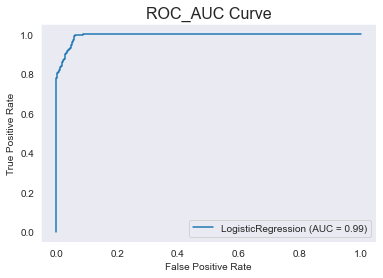

In [296]:
evaluation(logreg)

## K-Nearset Neighbors Model 

In [297]:
 # iterating knn model for all values of k from 1-39
error_rate = []

for i in range(1,40):   
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

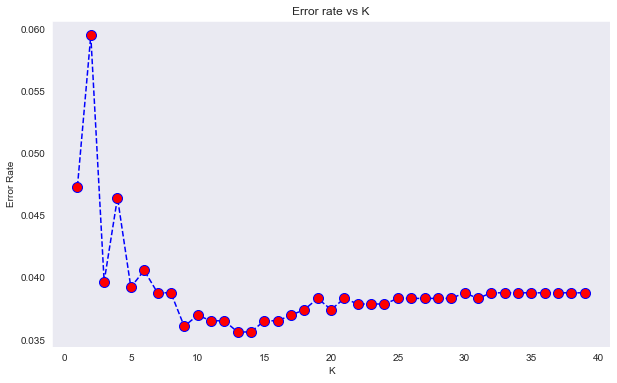

In [298]:
# ploting the error_rate

plt.figure(figsize=[10,6])
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [301]:
# # building knn and fit the model
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

[[2479  109]
 [  35 2553]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2588
           1       0.96      0.99      0.97      2588

    accuracy                           0.97      5176
   macro avg       0.97      0.97      0.97      5176
weighted avg       0.97      0.97      0.97      5176

Accuracy of TRAIN data: 97.21792890262752
F1_Score of TRAIN data: 97.21736013888112
[[1045   65]
 [  14 1095]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1110
           1       0.94      0.99      0.97      1109

    accuracy                           0.96      2219
   macro avg       0.97      0.96      0.96      2219
weighted avg       0.97      0.96      0.96      2219

Accuracy of TEST data: 96.43983776475889
F1_Score of TEST data: 96.43802927626572


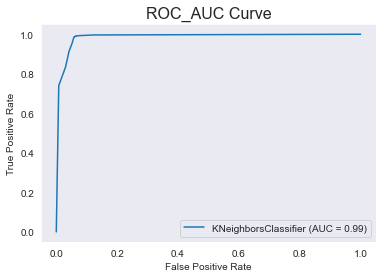

In [302]:
evaluation(knn)

## Random Forest 

In [42]:
params = {
    'max_depth': [10, 16, 20, 30],
    'min_samples_leaf': [10, 30, 50, 80, 100],
    'max_features': [2,3,4,5, 6, 7],
    'n_estimators': [30, 50, 100, 200]}

rfm_basic = RandomForestClassifier(random_state=42, oob_score=True)

grid_search = GridSearchCV(estimator=rfm_basic, param_grid=params,
                          cv=5, n_jobs=-1, verbose=1, scoring="accuracy")

In [43]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 14.3min finished
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 14min 19s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 16, 20, 30],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [10, 30, 50, 80, 100],
                         'n_estimators': [30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [44]:
rfm_best = grid_search.best_estimator_
rfm_best

RandomForestClassifier(max_depth=10, max_features=2, min_samples_leaf=50,
                       oob_score=True, random_state=42)

[[3509  188]
 [   0 3697]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3697
           1       0.95      1.00      0.98      3697

    accuracy                           0.97      7394
   macro avg       0.98      0.97      0.97      7394
weighted avg       0.98      0.97      0.97      7394

Accuracy of TRAIN data: 97.45739789018123
F1_Score of TRAIN data: 97.45575307894671
[[39696  2135]
 [    1  3696]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     41831
           1       0.63      1.00      0.78      3697

    accuracy                           0.95     45528
   macro avg       0.82      0.97      0.87     45528
weighted avg       0.97      0.95      0.96     45528

Accuracy of TEST data: 95.30838165524513
F1_Score of TEST data: 87.48095259634185


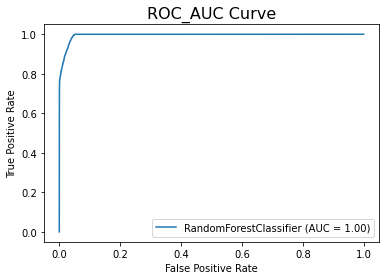

In [47]:
evaluation(rfm_best)

##  XGBOOST Model

In [144]:
import xgboost as xgb
scale_pos_weight = []
score_= []
lst = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
df_1 = df
for i in lst:
    xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
          colsample_bynode=1, colsample_bytree=0.9066782998097372,
          gamma=0.0016439843761698048, gpu_id=1, importance_type='gain', nthread=1,
          interaction_constraints='', learning_rate=0.1,
          max_delta_step=0, max_depth=4, min_child_weight=1, n_estimators=137, n_jobs=1,
          num_parallel_tree=1, random_state=123, scale_pos_weight=i,
          reg_alpha=0, reg_lambda=1,
          subsample=0.6023637423473936, tree_method='exact',
          validate_parameters=1)
    xgbc.fit(X_train, y_train)
    X_test1 = X_test
    y_test_1 = y_test
    pred_xgbc = xgbc.predict(X_test1)
    from sklearn import metrics
    from sklearn.metrics import accuracy_score

    score = accuracy_score(y_test_1, pred_xgbc, normalize=False)
    score = 100*(metrics.f1_score(y_test, pred_xgbc, average= "macro" ))
    scale_pos_weight.append(i)
    score_.append(score)
df = pd.DataFrame()
df['scale_pos_weight'] = scale_pos_weight
df['score'] = score_
df.to_csv('report.csv', index=False)

[13:27:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1
[13:27:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1
[13:27:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1
[13:27:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1
[13:27:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1
[13:27:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1
[13:27:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No vi

<Figure size 1680x1440 with 0 Axes>

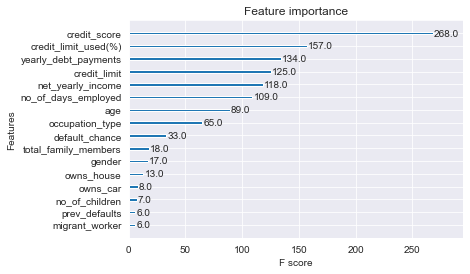

In [150]:
from xgboost import plot_importance
plt.figure(figsize=(28,24), dpi= 60)
plot_importance(xgbc)
plt.show()

In [157]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', activation = 'relu', max_iter=10,
                    alpha=1e-5, hidden_layer_sizes=(17,), 
                    random_state=0, early_stopping = True, verbose = True)

clf.fit(X_train, y_train)  
acc = clf.score(X_train, y_train)  
acc_test = clf.score(X_test, y_test)  

Iteration 1, loss = 1.09780854
Validation score: 0.536680
Iteration 2, loss = 0.86876794
Validation score: 0.575290
Iteration 3, loss = 0.68728605
Validation score: 0.660232
Iteration 4, loss = 0.54999604
Validation score: 0.768340
Iteration 5, loss = 0.44707667
Validation score: 0.847490
Iteration 6, loss = 0.37072928
Validation score: 0.880309
Iteration 7, loss = 0.31248552
Validation score: 0.901544
Iteration 8, loss = 0.26833050
Validation score: 0.920849
Iteration 9, loss = 0.23428675
Validation score: 0.924710
Iteration 10, loss = 0.20773493
Validation score: 0.938224


C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [158]:
clf.coefs_

[array([[-1.33522563e-02,  1.24900558e-01, -1.33718547e-02,
          1.07811424e-01, -2.12438253e-01,  1.03005256e-01,
         -6.03950383e-03,  2.35025514e-01,  3.34571569e-01,
         -2.58748355e-02,  2.05038444e-01, -6.04073521e-02,
         -5.28174008e-02,  4.35528434e-01, -2.31293553e-01,
         -2.14502640e-01, -2.74047270e-01],
        [ 1.64221641e-01,  1.31346961e-01,  4.07126469e-01,
          3.27682518e-01,  3.15911791e-01,  4.22067494e-02,
          1.50117363e-01, -1.99286992e-01,  4.90088507e-02,
         -2.34359170e-01,  3.09710813e-01, -1.57862920e-01,
         -1.14552717e-01, -2.84025971e-01,  1.42864180e-01,
         -5.27391999e-03,  3.31734588e-02],
        [-2.19035179e-01,  1.32389274e-01, -1.46079896e-02,
          1.75871334e-01,  4.50639570e-01,  2.13949354e-01,
         -2.75021241e-02,  1.74974252e-02,  1.09320027e-01,
         -2.68120310e-01,  1.98452039e-01,  2.13006946e-01,
         -3.44219386e-01, -4.35624166e-01, -6.02425501e-02,
         -3.

<AxesSubplot:>

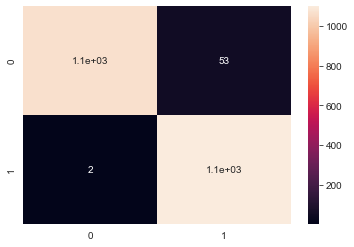

In [284]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
model  = RandomForestClassifier(random_state=42)
X_tr,X_te,Y_tr,Y_te = train_test_split(X,y,test_size=0.3,random_state=42)
score = model.fit(X_tr,Y_tr)
ac = accuracy_score(Y_te,score.predict(X_te))
cm = confusion_matrix(Y_te,score.predict(X_te))
sns.heatmap(cm,annot=True) 

## NN for  dataset 

In [314]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
from matplotlib import ticker
K = range(1,21)
for_plt_accur = []
for k in K:
    model = Sequential()
    model.add(Dense(k, input_shape=(8,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=150, batch_size=10)

    # evaluate the keras model
    _, accuracy = model.evaluate(X_test, y_test)
    print('Accuracy: %.2f' % (accuracy*100), 'for k=',k )
    for_plt_accur.append(accuracy*100)
    
#from matplotlib.ticker import MaxNLocator
#plt.xlabel.set_major_locator(MaxNLocator(integer=True))
plt.xticks(np.arange(min(K), max(K)+1, 1.0))    
plt.plot(K, for_plt_accur, 'bx-')
plt.xlabel('k')
plt.ylabel('acc')
plt.title('Optimal nodes in the hidden layer')
plt.show()

Feature: 0, Score: -0.00007
Feature: 1, Score: -0.01964
Feature: 2, Score: -0.00931
Feature: 3, Score: -0.00504
Feature: 4, Score: 0.00934
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: -0.00459
Feature: 8, Score: 0.00558
Feature: 9, Score: -0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00080
Feature: 12, Score: -0.00060
Feature: 13, Score: 0.05569
Feature: 14, Score: 0.10366
Feature: 15, Score: 0.67074


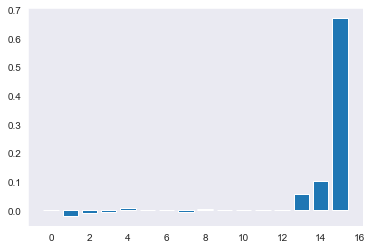

In [296]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X = df[['age', 'gender', 'owns_car', 'owns_house', 'no_of_children', 'net_yearly_income', 'no_of_days_employed', 
        'total_family_members', 'migrant_worker', 'yearly_debt_payments', 'credit_limit', 
        'credit_limit_used(%)', 'credit_score', 'prev_defaults', 'default_in_last_6months', 'default_chance']]
y = df['credit_card_default']
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [302]:
one_hot_encoded_data0.drop(['credit_card_default'], inplace = True, axis = 1)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.18499
Feature: 6, Score: 0.07555
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.14166
Feature: 10, Score: 0.15142
Feature: 11, Score: 0.00032
Feature: 12, Score: 0.00146
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000


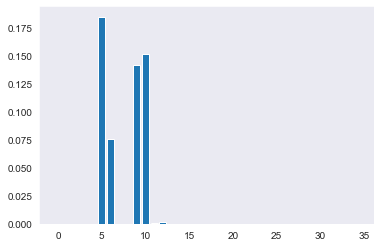

In [303]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X = one_hot_encoded_data0
y = df['credit_card_default']
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# PyCaret (Auto-ML):

In [304]:
df.drop(['age', 'gender', 'owns_car', 'owns_house', 'no_of_children', 
         'net_yearly_income', 'no_of_days_employed', 'occupation_type', 'total_family_members', 
         'migrant_worker', 'yearly_debt_payments', 'credit_score'], axis=1, inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [307]:
%%capture
from pycaret.classification import *
import pycaret.classification as pc

In [308]:
set = pc.setup(data = df, target = 'credit_card_default');

RuntimeError: This version of PyCaret requires scikit-learn==0.23.2, got 0.24.1. Support for newer scikit-learn versions will be added in a future release.

In [309]:
pc.compare_models();

NameError: name '_all_models' is not defined